# Primitive result visualisation    

In [8]:
# Load previously stored data
import json as j
import os

# Find most recent result file
files = [file for file in os.listdir('../results') if file[-5:] == '.json']
files.sort()

latest_file = files[-1]

# Load result data from json-file
result = j.load(open(f'../results/{latest_file}','r'))

# Plot accuracy


In [9]:
# binning
import numpy as np
binsize = 20

def bin_mean(x, binsize=binsize):
    # TODO improve this workaround
    # drop last items to fit binsize
    x = x[:len(x)-len(x)%binsize]
    bins = np.reshape(x,(-1,binsize))
    return np.mean(bins,axis = -1)

def bin_max(x, binsize=binsize):
    # TODO improve this workaround
    # drop last items to fit binsize
    x = x[:len(x)-len(x)%binsize]
    bins  = np.reshape(x,(-1,binsize))
    return np.max(bins,axis=-1)

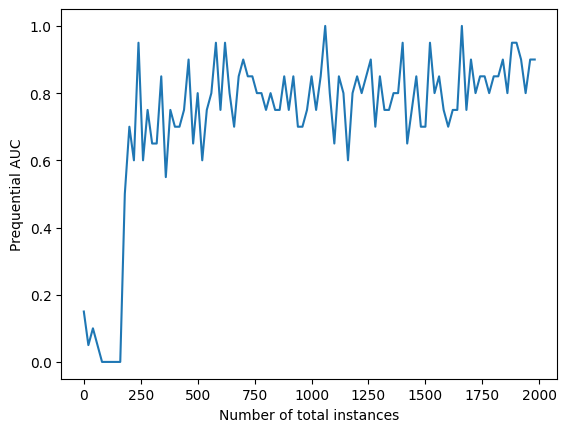

In [10]:
# Plot Prequential AUC
import matplotlib.pyplot as plt

acc = result["acc_preq"]
acc = bin_mean(acc)

plt.ylabel("Prequential AUC")
plt.xlabel("Number of total instances")
plt.plot(np.arange(acc.shape[0]) * binsize, acc)




Total number of queries:  300
Total number of datapoints: 2000


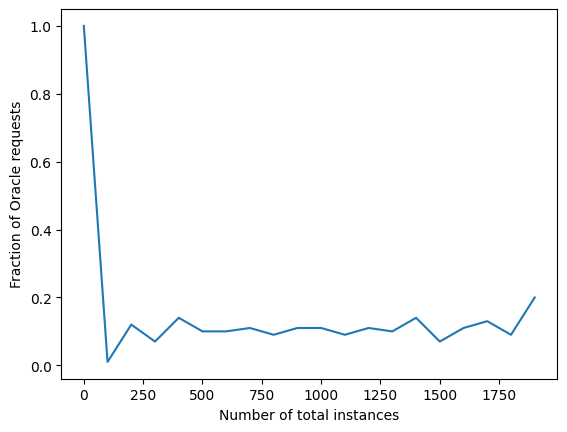

In [11]:
# Portion of Oracle queries over time
binsize = 100

queried_num = bin_mean(result['strategy_queried'], binsize=binsize)

plt.ylabel("Fraction of Oracle requests")
plt.xlabel("Number of total instances")
plt.plot(np.arange(queried_num.shape[0]) * binsize, queried_num)

print("Total number of queries: ", np.sum(result['strategy_queried']))
print("Total number of datapoints:", len(result["acc_preq"]))

Total number of queries:  300
Total number of datapoints: 2000


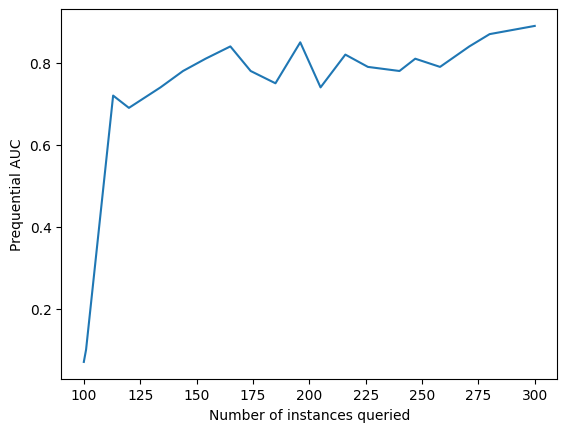

In [7]:
# Prequential AUC over labeled datapoints
binsize = 100

queried_num = bin_max(result['strategy_queried'], binsize=binsize)

import copy
queried_num_total = copy.copy(result['strategy_queried'])


for i in range(1, len(queried_num_total)):
    queried_num_total[i] += queried_num_total[i-1]
queried_num_total = np.array(queried_num_total)

# bin queried_num_total 
# TODO should this be mean or max?
queried_num_total_bin = bin_max(queried_num_total, binsize=binsize)

acc = result["acc_preq"]
acc = bin_mean(acc, binsize=binsize)



plt.ylabel("Prequential AUC")
plt.xlabel("Number of instances queried")


plt.plot(queried_num_total_bin, acc)

print("Total number of queries: ", np.sum(result['strategy_queried']))
print("Total number of datapoints:", len(result["acc_preq"]))